In [121]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import mplfinance as mpf
import numpy as np
import urllib
from urllib.request import urlopen
import json
import csv
from datetime import datetime
import time
import datetime as dt
import time
import pandas as pd
from matplotlib import style

In [157]:
style.use('bmh')
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [123]:
def graph_data():
    url = "https://financialmodelingprep.com/api/v3/historical-price-full/AAPL?apikey=demo"
    response = urlopen(url)
    data = response.read().decode("utf-8")
    data=json.loads(data)
    employee_data = data['historical']
    data_file = open('data_file.csv', 'w')
    csv_writer = csv.writer(data_file)
    count = 0
    for emp in employee_data:
        if count == 0:
            header = emp.keys()
            csv_writer.writerow(header)
            count += 1
        csv_writer.writerow(emp.values())


In [124]:
graph_data()

In [125]:
def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data():

    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'

    source_code = urllib.request.urlopen(stock_price_url).read().decode()

    stock_data = []
    split_source = source_code.split('\n')

    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line:
                stock_data.append(line)
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: bytespdate2num('%Y-%m-%d')})
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1),(0,0))
    
    ax1.plot_date(date, closep, "-", label="Price")
    ax1.plot([],[], linewidth=5, label="loss", color='g', alpha=0.3)
    ax1.plot([],[], linewidth=5, label="gain", color='r', alpha=0.3)

    ax1.fill_between(date, closep, 136, where=(closep > 136), facecolor='g', alpha=0.3)
    
    ax1.fill_between(date, closep, 136, where=(closep < 136), facecolor='r', alpha=0.3)
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
#     ax1.grid(True, color="g", linestyle="-", linewidth=2)
    
    ax1.xaxis.label.set_color('c')
    ax1.yaxis.label.set_color('r')
    
    ax1.set_yticks([x for x in range(0,1000,200)])
    
    plt.xlabel("year")
    plt.ylabel("price")
    plt.title("Financial Data")
    
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.16, top=0.95, right=0.99, wspace=0.2, hspace=0)

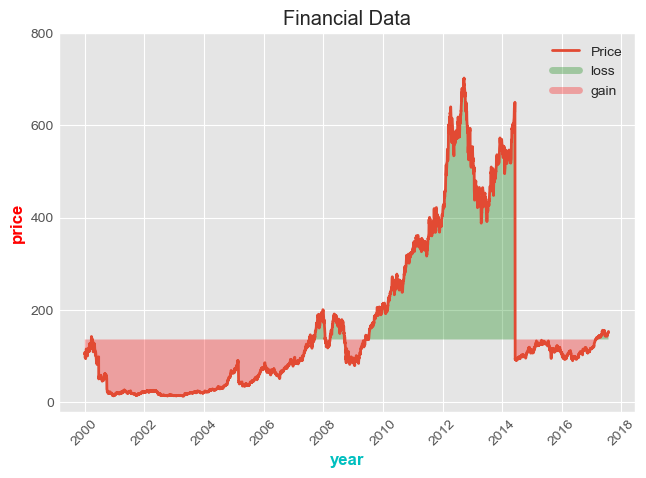

In [126]:
graph_data()


In [127]:
print(datetime.fromtimestamp(time.time()))

2020-06-22 00:59:40.895252


In [128]:
dateconv = np.vectorize(datetime.fromtimestamp)

In [129]:
date = dateconv(time.time())

In [130]:
print(date)

2020-06-22 00:59:41.141120


In [131]:
def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data():

    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'

    source_code = urllib.request.urlopen(stock_price_url).read().decode()

    stock_data = []
    split_source = source_code.split('\n')

    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line:
                stock_data.append(line)
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: bytespdate2num('%Y-%m-%d')})
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1),(0,0))
    
    ax1.plot_date(date, closep, "-", label="Price")
    ax1.plot([],[], linewidth=5, label="loss", color='g', alpha=0.3)
    ax1.plot([],[], linewidth=5, label="gain", color='r', alpha=0.3)
    ax1.axhline(136, color='k', linewidth=2)
    ax1.fill_between(date, closep, 136, where=(closep > 136), facecolor='g', alpha=0.3)
    
    ax1.fill_between(date, closep, 136, where=(closep < 136), facecolor='r', alpha=0.3)
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
#     ax1.grid(True, color="g", linestyle="-", linewidth=2)
    
    ax1.spines['left'].set_color('c')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_linewidth(2)
    
    ax1.tick_params(axis='x',colors='#f06215')
    ax1.set_yticks([x for x in range(0,1000,200)])
    
    plt.xlabel("year")
    plt.ylabel("price")
    plt.title("Financial Data")
    
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.16, top=0.95, right=0.99, wspace=0.2, hspace=0)

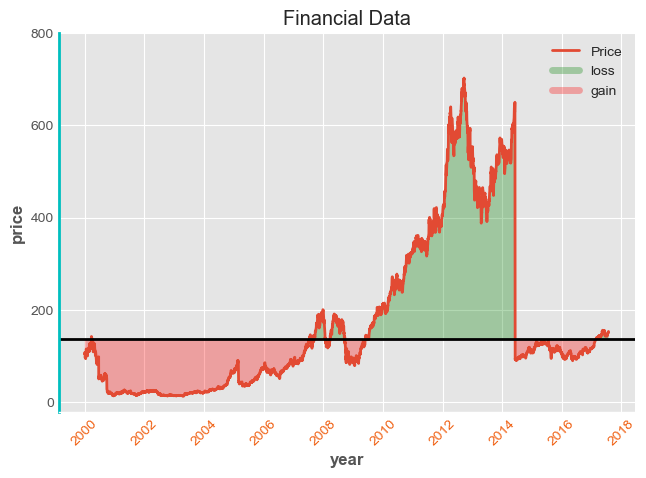

In [132]:
graph_data()


In [135]:
def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data():

    daily = pd.read_csv("data_file.csv",index_col="Date",parse_dates=True)
    x = 0
    y = 50
    ohlc = []
    print(daily.head())
#     while x < y:
#         append_me = (date[x], openp[x], lowp[x], closep[x], volume[x])
#         ohlc.append(append_me)
#         x +=1
    print(ohlc)
    mpf.plot(daily[0:50],type='candle',mav=(3,6,9),volume=True,show_nontrading=True)

              Open    High     Low   Close  adjClose      Volume  \
Date                                                               
2020-06-19  354.64  356.56  345.15  349.72    349.72  66072700.0   
2020-06-18  351.41  353.45  349.22  351.73    351.73  24205100.0   
2020-06-17  355.15  355.40  351.09  351.59    351.59  28532000.0   
2020-06-16  351.46  353.20  344.72  352.08    352.08  41357200.0   
2020-06-15  333.25  345.68  332.58  342.99    342.99  34702200.0   

            unadjustedVolume  change  changePercent       vwap        label  \
Date                                                                          
2020-06-19        66072700.0   -4.92         -1.387  350.47667  June 19, 20   
2020-06-18        24205100.0    0.32          0.091  351.46667  June 18, 20   
2020-06-17        28532000.0   -3.56         -1.002  352.69333  June 17, 20   
2020-06-16        41357200.0    0.62          0.176  350.00000  June 16, 20   
2020-06-15        34702200.0    9.74          2.9

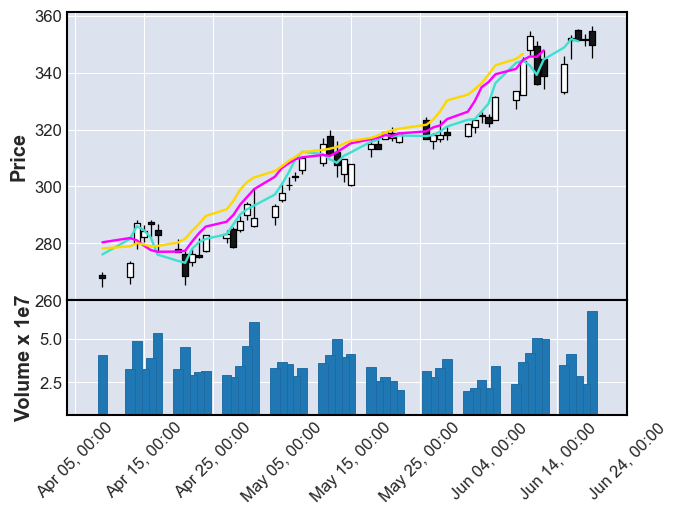

In [136]:
graph_data()

In [150]:
def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data():

    daily = pd.read_csv("data_file.csv",index_col="Date",parse_dates=True)
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1),(0,0))
    ax1.plot(daily.index[0:50],daily.High[0:50])
    ax1.plot(daily.index[0:50],daily.Low[0:50])
    

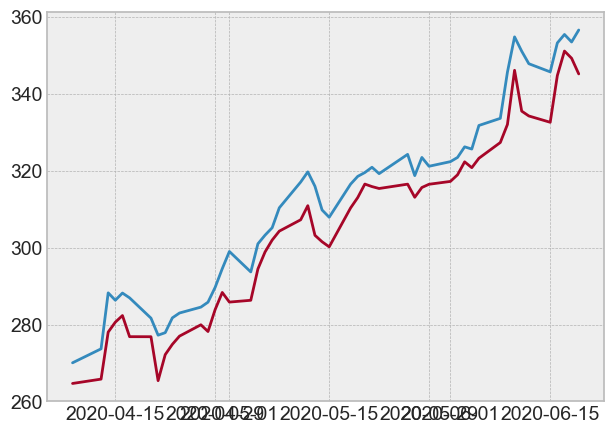

In [158]:
graph_data()

In [159]:
plt.__file__

'c:\\python\\lib\\site-packages\\matplotlib\\pyplot.py'